In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('mobile_cleaned.csv')

In [3]:
data.head()

,sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,...,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,0,12,55,155.0,250,1.3,10.5,5,2.00,0,...,4,2,3,67.8,64.0,5,3,2000,125,1
1,0,1,55,132.0,300,1.3,10.6,5,0.30,1,...,4,4,6,64.0,32.0,5,3,2000,165,1
2,0,9,55,142.0,329,1.5,8.5,5,2.00,3,...,4,9,6,72.0,32.0,6,3,2500,164,0
3,0,8,55,152.0,385,1.3,8.0,5,2.00,3,...,4,1,3,75.1,32.0,6,3,3000,165,1
4,1,1,55,234.0,385,1.3,7.9,5,1.92,3,...,4,1,6,91.0,32.0,6,3,3000,165,0


In [4]:
data.shape

(109, 40)

In [7]:
#dir(data)

In [9]:
 df_thin = data[['stand_by_time', 'expandable_memory','price','battery_capacity','is_liked']]

In [10]:
df_thin.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
2,329,32.0,4777,2500,0
3,385,32.0,5799,3000,1
4,385,32.0,5990,3000,0


In [11]:
df_liked = df_thin[df_thin['is_liked'] == 1]

In [12]:
df_liked.head()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
0,250,64.0,3870,2000,1
1,300,32.0,4059,2000,1
3,385,32.0,5799,3000,1
6,230,128.0,5999,1700,1
7,182,32.0,6599,2000,1


In [13]:
df_thin['price'].mean()

19373.211009174312

In [14]:
df_thin['price'].describe()

count      109.000000
mean     19373.211009
std      14039.197220
min       3870.000000
25%       8999.000000
50%      14614.000000
75%      24999.000000
max      64500.000000
Name: price, dtype: float64

In [15]:
df_thin.describe()

,stand_by_time,expandable_memory,price,battery_capacity,is_liked
count,109.00000,109.000000,109.000000,109.000000,109.000000
mean,404.66055,104.513761,19373.211009,2841.779817,0.844037
std,176.44206,275.799767,14039.197220,655.003963,0.364496
min,160.00000,0.000000,3870.000000,1560.000000,0.000000
25%,264.00000,0.000000,8999.000000,2470.000000,1.000000
50%,360.00000,32.000000,14614.000000,2900.000000,1.000000
75%,500.00000,128.000000,24999.000000,3100.000000,1.000000
max,1093.00000,2048.000000,64500.000000,5000.000000,1.000000


In [16]:
df_thin[df_thin['is_liked'] == 1]['price'].mean()

19393.239130434784

In [17]:
df_thin[df_thin['is_liked'] == 0]['price'].mean()

19264.823529411766

In [18]:
grp = df_thin.groupby(['is_liked'])

In [20]:
for key, df_key in grp:
    print(key)
    print(df_key)

0
     stand_by_time  expandable_memory  price  battery_capacity  is_liked
2              329               32.0   4777              2500         0
4              385               32.0   5990              3000         0
5              280               32.0   5999              2900         0
11             300              128.0   6990              2600         0
22             354              128.0   7999              2400         0
38             490               32.0   9999              2100         0
53             345               64.0  14300              2950         0
60             840                0.0  15689              4100         0
74             390              128.0  21999              2800         0
77             620              128.0  22999              3100         0
78             618                0.0  24499              3600         0
80             598                0.0  24999              3000         0
83             504              200.0  25500     

In [21]:
df_thin.groupby(['is_liked']).mean()

,stand_by_time,expandable_memory,price,battery_capacity
is_liked,,,,
0,457.235294,68.235294,19264.823529,2874.941176
1,394.945652,111.217391,19393.239130,2835.652174


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

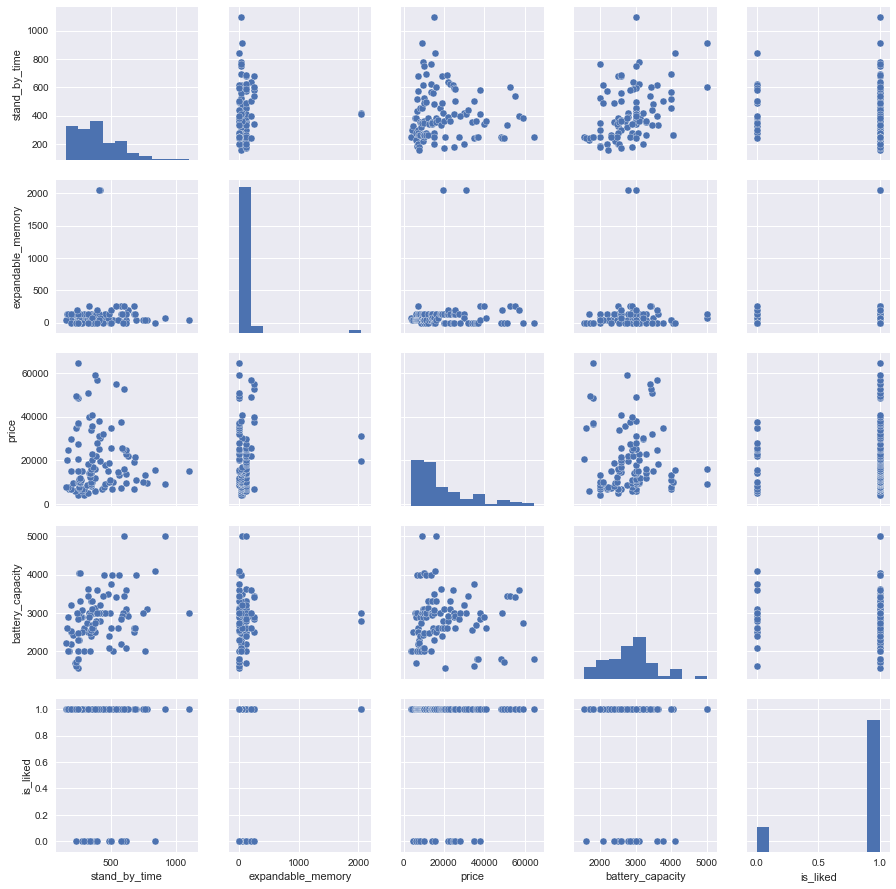

In [23]:
ax = sns.pairplot(df_thin, diag_kind='hist')

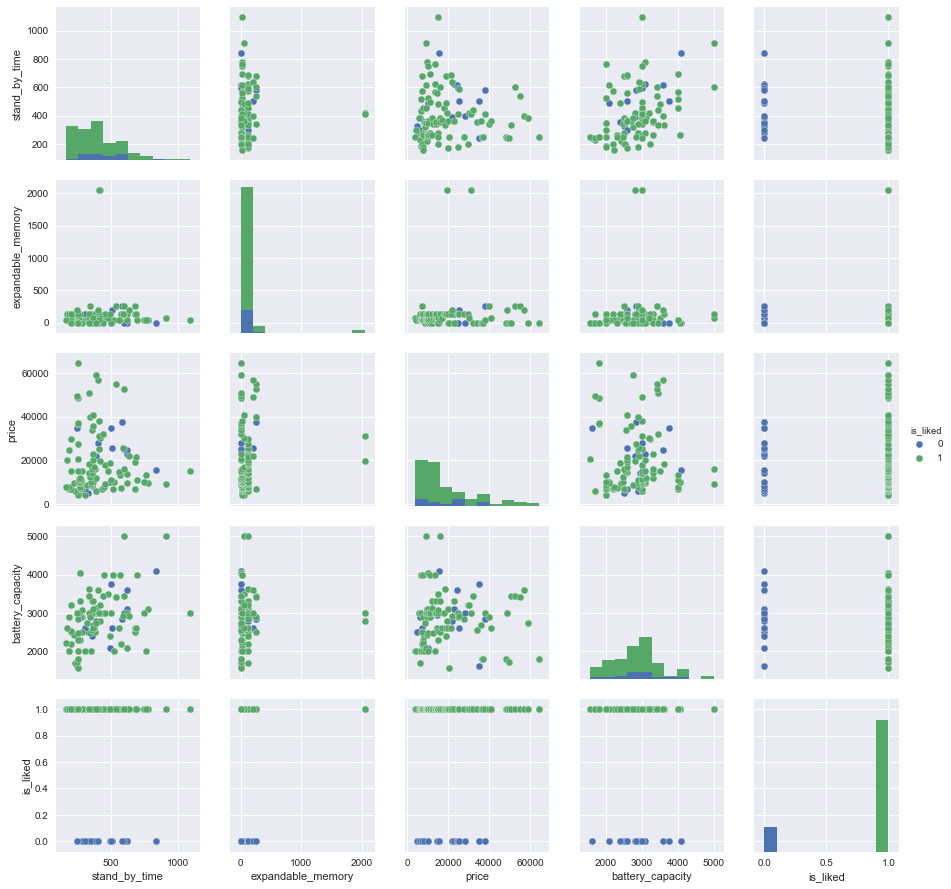

In [24]:
ax = sns.pairplot(df_thin, diag_kind='hist', hue='is_liked')